In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from copy import deepcopy

Text(0, 0.5, 'Petal Width')

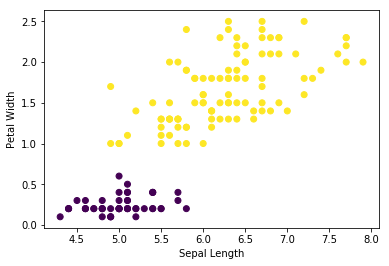

In [48]:
data = load_iris()
df = pd.DataFrame()
df['SL'] = data['data'][:,0]
df['PW'] = data['data'][:,3]
labels = [0]*150
labels[50:] = [1]*100
df['Class']=labels
X = np.array(df[['SL','PW']])
y = np.array(df['Class'])
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

In [49]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

In [50]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [51]:
class logistic():
    
    def __init__(self, alpha=0.05, iter_count=1000):
        self.thetas = None
        self.alpha = alpha
        self.iter_count = iter_count
    
    def fit(self, X, y):
        self.thetas  = np.zeros(X.shape[1])
        for i in range(self.iter_count):
            linear_prediction = np.dot(X, self.thetas)
            transformed = sigmoid(linear_prediction)
            predicted = deepcopy(transformed)
            error_to_propagate = y - predicted
            gradient = np.dot(X.T, error_to_propagate)
            self.thetas+= self.alpha*gradient
    
    def get_params(self):
        return self.thetas
    
    def probability_values(self, X):
        class_1 = sigmoid(np.dot(X,thetas))
        return np.array([class_1, 1-class_1])
    
    def predict(self, X):
        return sigmoid(np.dot(X, self.thetas))
        
    def accuracy(self, X, y):
        predicted = [round(i) for i in self.predict(X)]
        return accuracy_score(predicted,y)

In [53]:
logistic_regression = logistic()
logistic_regression.fit(X_train,y_train)
logistic_regression.accuracy(X_test,y_test)
params = logistic_regression.get_params()

In [54]:
params

array([-2.34870604, 16.57248689])

[(-2, 4), Text(0, 0.5, '$X_2$'), (3, 9), Text(0.5, 0, '$X_1$'), None]

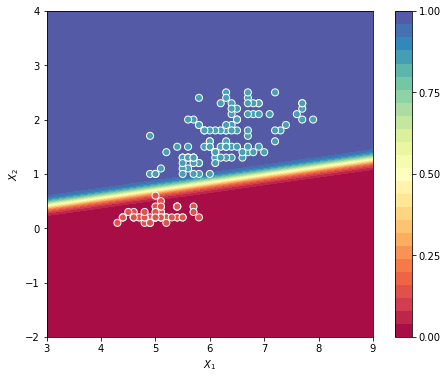

In [60]:
xx, yy = np.mgrid[3:9:.01, -2:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logistic_regression.predict(grid)
probs = probs.reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap=plt.cm.Spectral,vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X[:,0], X[:,1], c=y[:], s=50,cmap=plt.cm.Spectral, vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="equal",xlim=(3, 9), ylim=(-2, 4),xlabel="$X_1$", ylabel="$X_2$")

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=False)
lr.fit(X_train,y_train)
lr.coef_,lr.score(X_test,y_test)

(array([[-0.52893955,  4.00601434]]), 1.0)

In [59]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
probs

array([[2.81596990e-08, 2.93106809e-08, 3.05087073e-08, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.80111445e-08, 2.91560544e-08, 3.03477607e-08, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.78633736e-08, 2.90022437e-08, 3.01876632e-08, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.44332525e-10, 1.50231882e-10, 1.56372366e-10, ...,
        9.99999969e-01, 9.99999970e-01, 9.99999971e-01],
       [1.43571108e-10, 1.49439344e-10, 1.55547434e-10, ...,
        9.99999969e-01, 9.99999970e-01, 9.99999971e-01],
       [1.42813709e-10, 1.48650987e-10, 1.54726854e-10, ...,
        9.99999968e-01, 9.99999970e-01, 9.99999971e-01]])